<a href="https://colab.research.google.com/github/yrsheld/Practice/blob/main/MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import NearestNeighbors

# Add label

In [6]:
# 10 features, 1 output (class)
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [8]:
df['class'] = (df['class']=='g').astype(int)

In [9]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


# Plot feature histograms

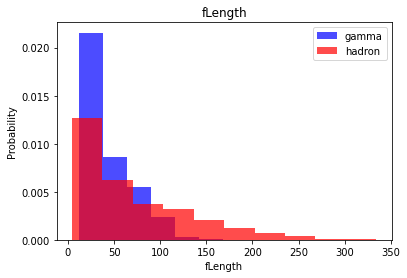

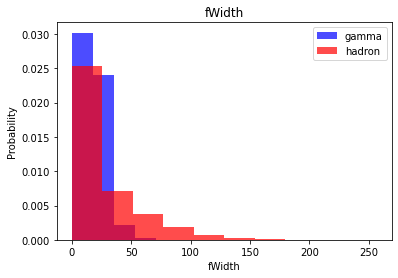

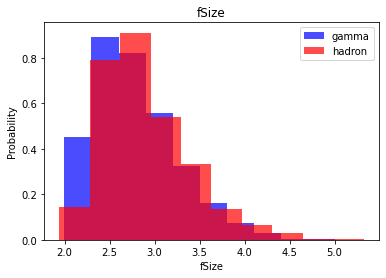

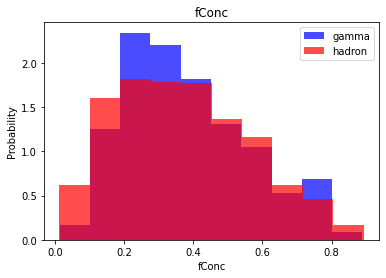

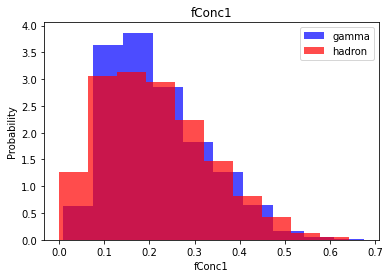

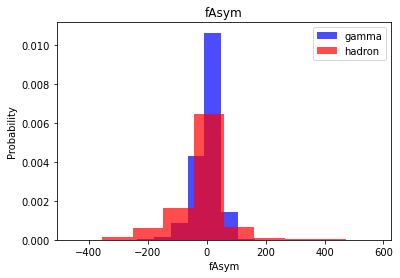

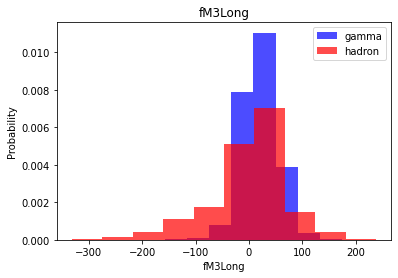

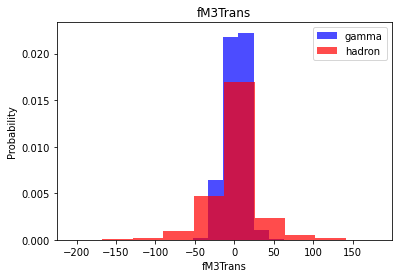

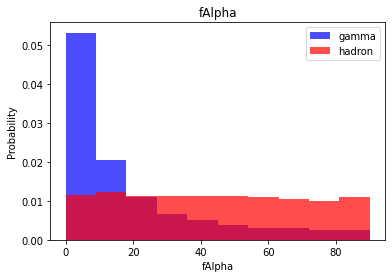

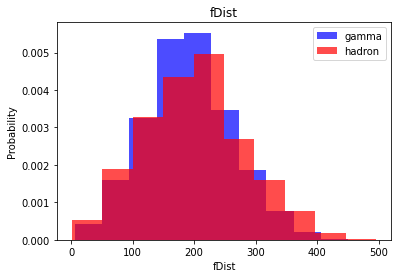

In [10]:
for feature in cols[:-1]:
  plt.hist(df[df['class']==1][feature], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][feature], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(feature)
  plt.ylabel('Probability')
  plt.xlabel(feature)
  plt.legend()
  plt.show()

# Train, Validation, Test datasets
Split the original dataset and standardize data values.
Due to the difference of amount of data from different classes, we may also need resampling in the training dataset. 

In [11]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])  #60, 20, 20

In [12]:
def scaler_dataset(dataframe, oversample=False):
  # standardizing data
  # oversample: True, if need rebalancing the amount of data from different classes
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [13]:
train, X_train, y_train = scaler_dataset(train, oversample=True)
valid, X_valid, y_valid = scaler_dataset(valid, oversample=False)
test, X_test, y_test = scaler_dataset(test, oversample=False)

# kNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = knn_model.predict(X_test)

# Print out classification report
# precision: true positive / predicted positive
# recall: true positive / positive
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1337
           1       0.85      0.84      0.85      2467

    accuracy                           0.80      3804
   macro avg       0.78      0.79      0.79      3804
weighted avg       0.80      0.80      0.80      3804



# Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1337
           1       0.74      0.90      0.81      2467

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1337
           1       0.85      0.82      0.84      2467

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



# SVM

In [23]:
from sklearn.svm import SVC

In [24]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [25]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1337
           1       0.89      0.90      0.89      2467

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [26]:
import tensorflow as tf

### Plot loss and accuracy for each epoch

In [27]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 cols
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss') #validation loww
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')  #validation accuracy
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax1.grid(True)

  plt.show()

In [28]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

### Try out different hyperparameter 
#### nodes per layer, dropout probability, learning rate, batch size

In [29]:
"""
least_val_loss = float('inf')
least_loss_model = None
epochs=100


for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model
"""

"\nleast_val_loss = float('inf')\nleast_loss_model = None\nepochs=100\n\n\nfor num_nodes in [16, 32, 64]:\n  for dropout_prob in [0, 0.2]:\n    for lr in [0.01, 0.005, 0.001]:\n      for batch_size in [32, 64, 128]:\n        print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')\n        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)\n        plot_history(history)\n        val_loss = model.evaluate(X_valid, y_valid)[0]\n        if val_loss < least_val_loss:\n          least_val_loss = val_loss\n          least_loss_model = model\n"

64 nodes, dropout 0.2, lr 0.001, batch size 64


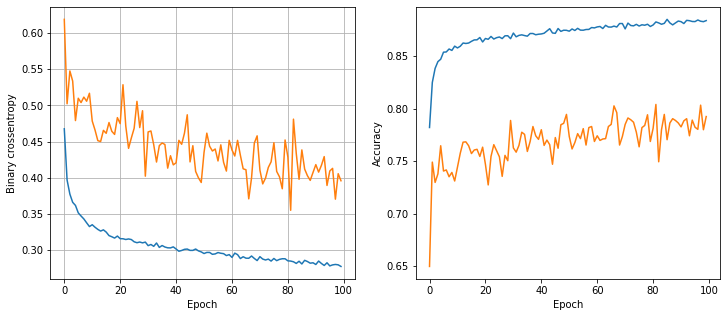

119/119 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8757
validation loss: 0.30675530433654785


In [30]:
#After testing out different hyperparameters
#least_loss_model: 64 nodes, dropout 0.2, lr 0.001, batch size 64

epochs = 100
num_nodes = 64
dropout_prob = 0.2
lr = 0.001
batch_size = 64
print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
plot_history(history)
val_loss = model.evaluate(X_valid, y_valid)[0]
print(f'validation loss: {val_loss}')

# Testing

In [33]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)    # sigmoid output

119/119 [==============================] - 0s 1ms/step


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1337
           1       0.88      0.94      0.91      2467

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

